## Inżynieria cech

In [351]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [352]:
df = pd.read_csv('dane.csv')
dane = df.drop(columns = 'identyfikator')

In [354]:
print("Ciekawostka!") 
print("Według danych z GUS:")
for i in range(len(dane["powiat"])):
        if dane["stadiony"][i] == max(dane["stadiony"]):
            print(dane["powiat"][i],"ma ", dane["stadiony"][i], "stadiony")
wypisane = False
for j in range(42):
    for i in range(len(dane["powiat"])):
        if dane["stadiony"][i] == max(dane["stadiony"] - j - 1):
            print(dane["powiat"][i],"ma ", dane["stadiony"][i], "stadiony")
            wypisane = True
            break
    if wypisane:
        break

Ciekawostka!
Według danych z GUS:
Powiat rzeszowski ma  42 stadiony
Powiat krośnieński ma  27 stadiony


In [355]:
from sklearn.model_selection import train_test_split

populacja = dane['populacja_ogolem']
dane.drop(['populacja_ogolem', 'powiat'], axis = 1, inplace = True)

In [356]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#podział na dane treningowe i testowe
dane_train, dane_test, populacja_train, populacja_test = train_test_split(dane, populacja, test_size = 0.2, random_state = 0)

model1 = LinearRegression()
model1.fit(dane_train, populacja_train)

print("MSE =", mean_squared_error(populacja_test, model1.predict(dane_test)))
print("R2 score =", r2_score(populacja_test, model1.predict(dane_test)))

MSE = 8894581.69925874
R2 score = 0.9991265298914818


Jak można było przypuszczać liczba ludności np z dostępem do kanalizacji jest z zbyt skorelowana z ogólną liczbą ludności (przewidywaną cechą) żeby wyciągnąć jakiekolwiek sensowne wnioski. Dlatego właśnie usuwamy cechy które zawierają w sobie liczbę ludności i tworzymy model korzystający z pozostałych cech.

In [357]:
#odrzucamy następujące kolumny ponieważ oznaczają one praktycznie to samo co chcemy przewidywać
dane.drop(['populacja_produkcyjna', 'wodociagi', 'gaz', 'kanalizacja'], axis = 1, inplace = True)

#podział na dane treningowe i testowe
dane_train, dane_test, populacja_train, populacja_test = train_test_split(dane, populacja, test_size = 0.2, random_state = 0)

model2 = LinearRegression()
model2.fit(dane_train, populacja_train)

print("MSE =", mean_squared_error(populacja_test, model2.predict(dane_test)))
print("R2 score for plain linear regression =", r2_score(populacja_test, model2.predict(dane_test)))

MSE = 371417737.4790971
R2 score for plain linear regression = 0.9635258517566379


Udało się uzyskać wynik mniejszy niż 1.0 po usunięciu zbyt skorelowanych cech. Teraz możemy zająć się polepszaniem tego wyniku w celu otrzymania dokładniejszego modelu.

stadiony                        2.177093
hale_sportowe                   5.195959
sale_gimnastyczne               5.141891
korty_tenisowe                  5.091206
plywalnie                      10.971238
drogi_utwardzone_na_obszar      1.667535
drogi_utwardzone_na_ludnosc     0.661188
drogi_gruntowe_na_obszar        1.660912
drogi_gruntowe_na_ludnosc       3.048154
szkoly_zawodowe                -1.859818
sciezki_rowerowe_na_obszar      2.755309
sciezki_rowerowe_na_ludnosc     1.605798
przystanki_zbiorkom             4.233128
licea                          10.629953
wynagrodzenia                   2.610878
odbior_odpadow                  1.849032
koszty_odpadow                  2.337063
szkoly_podstawowe               5.887423
dtype: float64


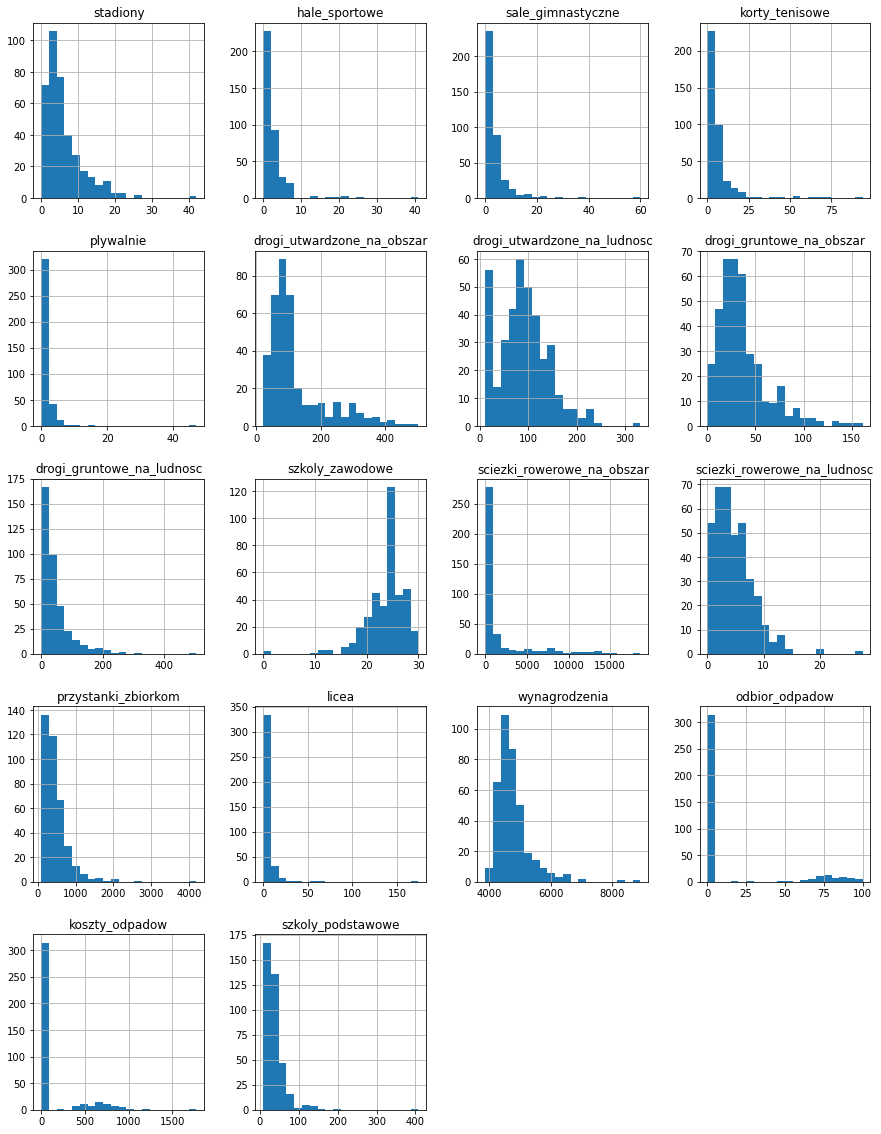

In [358]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dane.hist(ax = ax, bins=20)
print(dane.skew())

stadiony                        2.177093
hale_sportowe                   5.195959
sale_gimnastyczne               5.141891
korty_tenisowe                  5.091206
plywalnie                      10.971238
drogi_utwardzone_na_obszar      1.667535
drogi_utwardzone_na_ludnosc     0.661188
drogi_gruntowe_na_obszar        1.660912
drogi_gruntowe_na_ludnosc       3.048154
szkoly_zawodowe                -1.859818
sciezki_rowerowe_na_obszar      2.755309
sciezki_rowerowe_na_ludnosc     1.605798
przystanki_zbiorkom             4.233128
licea                          10.629953
wynagrodzenia                   2.610878
odbior_odpadow                  1.849032
koszty_odpadow                  2.337063
szkoly_podstawowe               5.887423
log_licea                       1.156949
log_plywalnie                   0.833077
log_szkoly_podstawowe           0.608497
log_przystanki_zbiorkom         0.367915
log_hale_sportowe               0.318653
log_sale_gimnastyczne           0.619592
log_korty_teniso

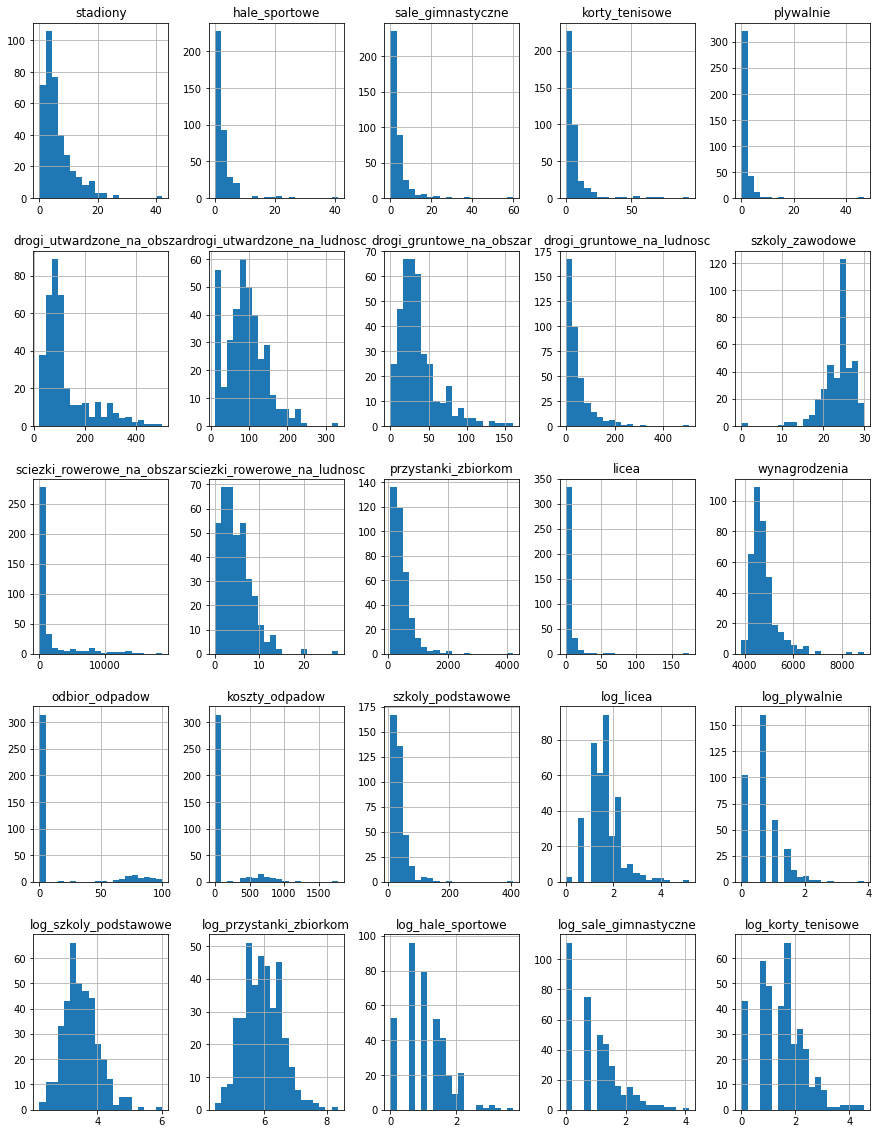

In [359]:
from math import log, sqrt

#dodaję logi wszystkich cech które są zbyt prawoskośne

dane['log_licea'] = dane['licea'].apply(lambda x: log(x + 1))
dane['log_plywalnie'] = dane['plywalnie'].apply(lambda x: log(x + 1))
dane['log_szkoly_podstawowe'] = dane['szkoly_podstawowe'].apply(lambda x: log(x + 1))
dane['log_przystanki_zbiorkom'] = dane['przystanki_zbiorkom'].apply(lambda x: log(x + 1))
dane['log_hale_sportowe'] = dane['hale_sportowe'].apply(lambda x: log(x + 1))
dane['log_sale_gimnastyczne'] = dane['sale_gimnastyczne'].apply(lambda x: log(x + 1))
dane['log_korty_tenisowe'] = dane['korty_tenisowe'].apply(lambda x: log(x + 1))
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dane.hist(ax = ax, bins=20)
print(dane.skew())

<AxesSubplot:>

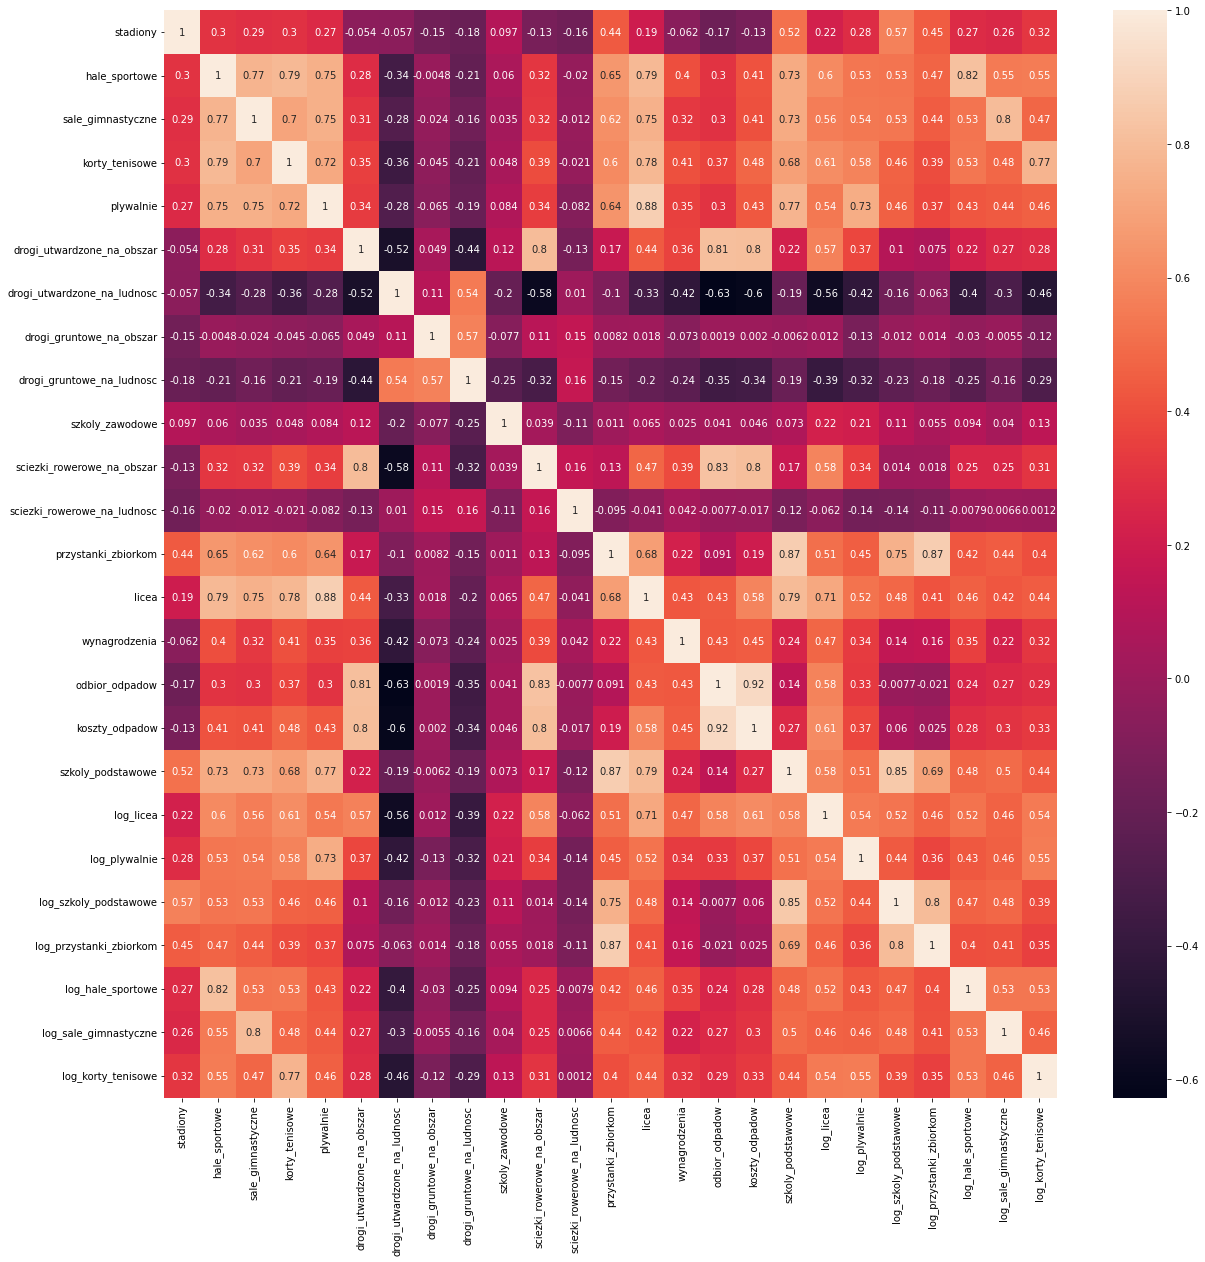

In [360]:
plt.subplots(figsize=(20, 20))
sns.heatmap(dane.corr(), annot = dane.corr())

In [361]:
#podział na dane treningowe i testowe
dane_train, dane_test, populacja_train, populacja_test = train_test_split(dane, populacja, test_size = 0.2, random_state = 0)

model3 = LinearRegression()
model3.fit(dane_train, populacja_train)

print("MSE =", mean_squared_error(populacja_test, model3.predict(dane_test)))
print("R2 score for linear regression with added features =", r2_score(populacja_test, model3.predict(dane_test)))

MSE = 313939564.4602113
R2 score for linear regression with added features = 0.9691703517142266


Wzrost *Explain variance score* świadczy o **poprawieniu** się predykcji po dodaniu cech.

Spróbujmy teraz zastosować **regresję wieloraką z pseudoinwerjsą**, być może uzyskamy dla niej lepszy wynik predykcji.

In [362]:
#podział na dane treningowe i testowe
dane_train, dane_test, populacja_train, populacja_test = train_test_split(dane, populacja, test_size = 0.2, random_state = 0)

#należy dodać kolumnę jedynek aby umożliwić dodanie wyrazu wolnego, niezależnego od żadnej z cech
dane_train['ones'] = np.ones((dane_train.shape[0], 1))
dane_test['ones'] = np.ones((dane_test.shape[0], 1))

#liczymy pseudoinwersję
pinw = np.linalg.pinv(dane_train)

#wyznaczamy współczynniki modelu
wsp = np.dot(pinw, populacja_train)

def predict_output(w, x):
    result = []
    for idx, i in x.iterrows():
        tmp = 0
        for val, coef in zip(i, w):
            tmp += val * coef
        result.append(tmp)
    return result

#liczymy błąd dla regresji wielorakiej

print("MSE =", mean_squared_error(populacja_test, predict_output(wsp, dane_test)))
print("R2 score for multiple regression =", r2_score(populacja_test, predict_output(wsp, dane_test)))

MSE = 313939564.46022326
R2 score for multiple regression = 0.9691703517142254


Jak widać *error* jest praktycznie identyczny co w przypadku modelu regresji liniowej, więc zostajemy przy tym pierwszym, ponieważ jest mniej złożony.

Spróbujmy teraz zastosować metodę **Ridge regression** w celu polepszenia predykcji.

In [363]:
from sklearn.linear_model import Ridge

#podział na dane treningowe i testowe
dane_train, dane_test, populacja_train, populacja_test = train_test_split(dane, populacja, test_size = 0.2, random_state = 0)

#po ręcznym sprawdzeniu wielu wartości współczynnika alpha, okazało się że najlepszy wynik otrzymujemy dla 0.825 
clf = Ridge(alpha = 0.825, fit_intercept = False)
clf.fit(dane_train, populacja_train)
wsp = list(clf.coef_)

print("MSE =", mean_squared_error(populacja_test, predict_output(wsp, dane_test)))
print("R2 score for ridge regression =", r2_score(populacja_test, predict_output(wsp, dane_test)))

MSE = 305296648.2864595
R2 score for ridge regression = 0.9700191076404137


Jest to jak do tej pory najlepszy z uzyskanych wyników.
Zastosujmy teraz metodę **LASSO** i porównajmy wyniki.

In [364]:
from sklearn import linear_model  # using scikit-learn

#podział na dane treningowe i testowe
dane_train, dane_test, populacja_train, populacja_test = train_test_split(dane, populacja, test_size = 0.2, random_state = 0)

lasso = linear_model.Lasso(alpha = 10, normalize = True) # set parameters
lasso.fit(dane_train, populacja_train) # learn weights

#wylistowanie pominiętych cech
for w, feat in zip(lasso.coef_, dane_train.columns):
    if w == 0.0:
        print(feat + " nie zostało wzięte pod uwagę")

print("MSE =", mean_squared_error(populacja_test, lasso.predict(dane_test)))
print("R2 score for LASSO regression =", r2_score(populacja_test, lasso.predict(dane_test)))

szkoly_zawodowe nie zostało wzięte pod uwagę
sciezki_rowerowe_na_ludnosc nie zostało wzięte pod uwagę
log_plywalnie nie zostało wzięte pod uwagę
log_przystanki_zbiorkom nie zostało wzięte pod uwagę
MSE = 305099474.5197683
R2 score for LASSO regression = 0.9700384705961109


Po sprawdzeniu wielu parametrów alpha, najlepszym okazał się *alpha = 10* z normalizacją cech.

Jest to jak na razie najlepszy wynik i jak widać z komunikatu na górze, pewne cechy nie zostały wzięte pod uwagę - ich współczynniki sie wyzerowały.

Stwierdziliśmy, że dane treningowe składające się z 300 powiatów nie są wystarczającą ilością do przeprowadzenia walidacji krzyżowej, właśnie z tego powodu dobory współczynników alpha w Lasso i Ridge regression przeprowadziliśmy ręcznie.

Zestawienie **MSE** i **R2** dla wszstkich opracowanych modeli:

Regresja liniowa przed dodaniem cech<br>
MSE = 371417737.4790971<br>
R2 = 0.9635258517566379<br>
Regresja liniowa po dodaniu chech<br>
MSE = 313939564.4602113<br>
R2 = 0.9691703517142266<br>
*Wszystkie kolejne regresje zawierają cechy dodane w poprzednim punkcie ponieważ poprawiły one wynik w zwykłej regresji.<br>*
Regresja wieloraka z pseudoinwerjsą<br>
MSE = 313939564.4602233<br>
R2 = 0.9691703517142254<br>
Regresja grzbietowa (Ridge)<br>
MSE = 305296648.2864595<br>
R2 = 0.9700191076404137<br>
**Regresja Lasso<br>
MSE = 305099474.5197683<br>
R2 = 0.9700384705961109<br>**
Regresja Lasso najlepiej sprawdza się dla naszego zbioru danych więc do wyciągnięcia wniosków posłużymy się wynikami z otrzymanymi z tego właśnie modelu.